# **Question 1 Work**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/juliazh1307/Parkinson-s-Data/main/parkinsons_disease_data.csv', index_col = 0)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


# Question 1 EDA

In [3]:
relevant_features = df.columns[0:10]

df_limited = df[relevant_features]
df_limited.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality
PatientID,,,,,,,,,,
3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194
3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470
3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824
3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189
3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925


In [ ]:
df_limited.corr()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality
Age,1.000000,0.008675,0.020966,0.015130,0.035622,-0.007591,-0.009016,0.028100,0.012580,0.020866
Gender,0.008675,1.000000,-0.021080,-0.011429,0.072500,-0.038296,-0.020645,-0.002626,-0.005765,-0.014885
Ethnicity,0.020966,-0.021080,1.000000,0.029189,-0.003830,0.052649,0.021406,0.011913,-0.027598,-0.011927
EducationLevel,0.015130,-0.011429,0.029189,1.000000,0.008032,-0.005192,-0.000339,-0.011574,0.026629,0.023454
BMI,0.035622,0.072500,-0.003830,0.008032,1.000000,-0.008026,0.015542,-0.003622,0.008020,0.017669
Smoking,-0.007591,-0.038296,0.052649,-0.005192,-0.008026,1.000000,-0.032095,-0.031046,0.034870,0.009966
AlcoholConsumption,-0.009016,-0.020645,0.021406,-0.000339,0.015542,-0.032095,1.000000,0.004530,0.007507,0.005871
PhysicalActivity,0.028100,-0.002626,0.011913,-0.011574,-0.003622,-0.031046,0.004530,1.000000,-0.017340,-0.007859
DietQuality,0.012580,-0.005765,-0.027598,0.026629,0.008020,0.034870,0.007507,-0.017340,1.000000,0.041904
SleepQuality,0.020866,-0.014885,-0.011927,0.023454,0.017669,0.009966,0.005871,-0.007859,0.041904,1.000000


All of the features we're working with have low correlation values associated with one another, so they should not interefere with each other in our analysis of coefficients (to be fair it is not entirely clear what a correlation for a categorical variable would indicate here, but those were kept in just in case/for convenience; regardless, none of the numeric features show particularly high correlation either).

In [ ]:
categorical_features = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'Diagnosis']

In [ ]:
for feature in categorical_features:
  print(df[feature].value_counts())

Gender
0    1068
1    1037
Name: count, dtype: int64
Ethnicity
0    1270
1     425
3     213
2     197
Name: count, dtype: int64
EducationLevel
1    840
2    656
0    388
3    221
Name: count, dtype: int64
Smoking
0    1481
1     624
Name: count, dtype: int64
Diagnosis
1    1304
0     801
Name: count, dtype: int64


The gender feature is pretty evenly split. The ethnicity feature is heavily biased towards Caucasion. There are many patients with high school or bachelor's level education, with far fewer patients having no education or a higher education. The smoking feature is heavily biased towards not smoking. The diagnosis feature is also somewhat biased, with about 62% of patients in the data set being diagnosed with Parkinson's.

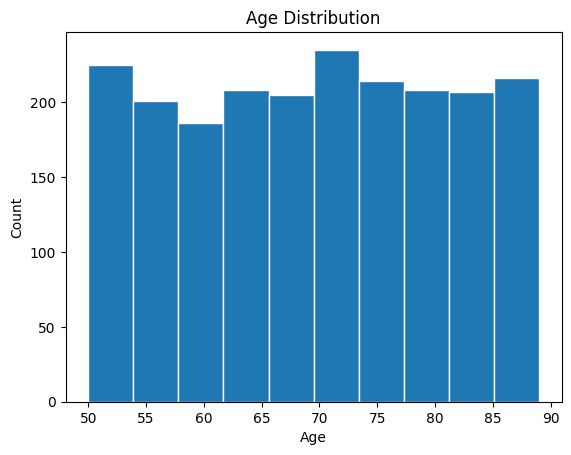

In [ ]:
fig010 = plt.figure()
plt.hist(df['Age'], bins = 10, edgecolor = 'white')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

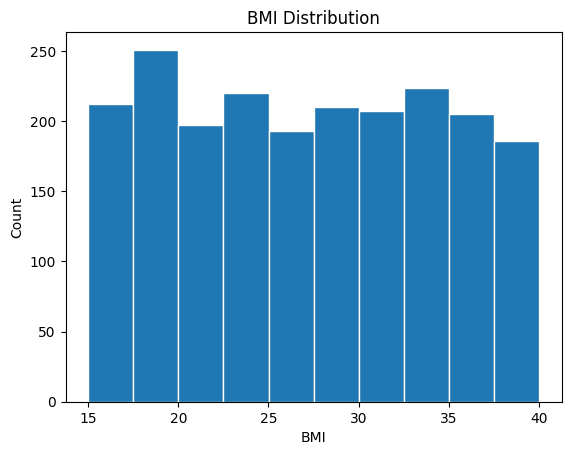

In [ ]:
fig020 = plt.figure()
plt.hist(df['BMI'], bins = 10, edgecolor = 'white')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

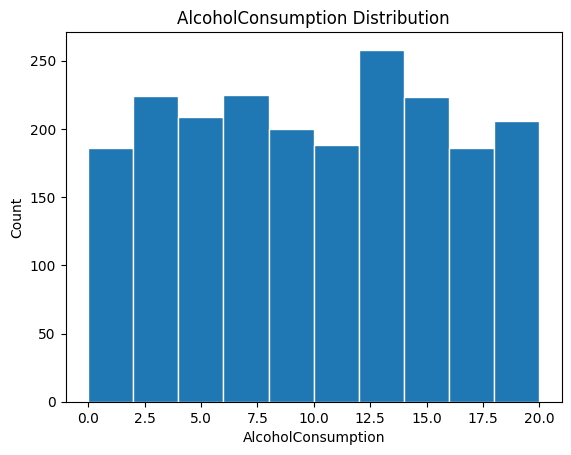

In [ ]:
fig030 = plt.figure()
plt.hist(df['AlcoholConsumption'], bins = 10, edgecolor = 'white')
plt.title('AlcoholConsumption Distribution')
plt.xlabel('AlcoholConsumption')
plt.ylabel('Count')
plt.show()

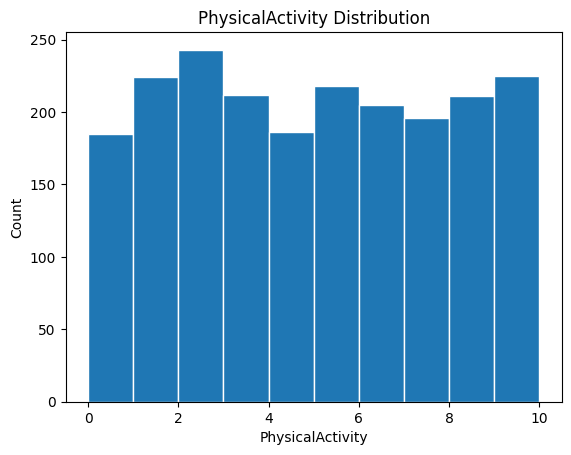

In [ ]:
fig040 = plt.figure()
plt.hist(df['PhysicalActivity'], bins = 10, edgecolor = 'white')
plt.title('PhysicalActivity Distribution')
plt.xlabel('PhysicalActivity')
plt.ylabel('Count')
plt.show()

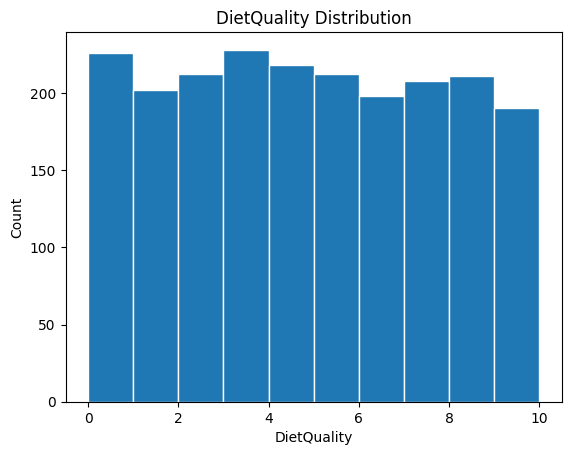

In [ ]:
fig050 = plt.figure()
plt.hist(df['DietQuality'], bins = 10, edgecolor = 'white')
plt.title('DietQuality Distribution')
plt.xlabel('DietQuality')
plt.ylabel('Count')
plt.show()

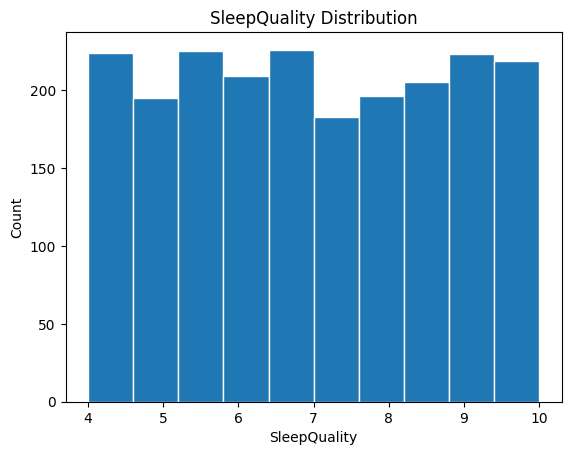

In [ ]:
fig060 = plt.figure()
plt.hist(df['SleepQuality'], bins = 10, edgecolor = 'white')
plt.title('SleepQuality Distribution')
plt.xlabel('SleepQuality')
plt.ylabel('Count')
plt.show()

All of the numeric features are pretty evenly distributed in the dataset, with no obvious skews in the number of patients that have a given score for any of the features.

In [ ]:
df_limited.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality
PatientID,,,,,,,,,,
3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194
3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470
3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824
3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189
3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925


# Data Prep

In [ ]:
def ethnicity_map(data):
  if data == 0:
    return 'Caucasion'
  elif data == 1:
    return 'African American'
  elif data == 2:
    return 'Asian'
  return 'Other'

In [ ]:
def education_map(data):
  if data == 0:
    return 'None'
  elif data == 1:
    return 'High School'
  elif data == 2:
    return "Bachelor's"
  return 'Higher'

In [ ]:
df['EducationLevel'] = df['EducationLevel'].map(education_map)
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_map)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
3058,85,0,Other,High School,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
3059,75,0,Caucasion,Bachelor's,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
3060,70,1,Caucasion,None,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3061,52,0,Caucasion,None,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
3062,87,0,Caucasion,High School,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


This was done just for the sake of readability while working with the data.

# Constructing the Model and Evaluating

In [ ]:
ct1 = make_column_transformer(
    (StandardScaler(), ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']),
    (OneHotEncoder(), ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking']),
    remainder = 'drop'
)

pipe1 = make_pipeline(
    ct1,
    LogisticRegression(solver = 'saga', max_iter = 1000)
)

gridCV1 = GridSearchCV(
    pipe1,
    param_grid = {
        'logisticregression__penalty':['l1', 'l2', None]
    },
    scoring = 'f1_macro',
    cv = 10
)

In [ ]:
gridCV1.fit(df, df['Diagnosis'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'BMI',
                                                                          'AlcoholConsumption',
                                                                          'PhysicalActivity',
                                                                          'DietQuality',
                                                                          'SleepQuality']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Ethnicity',
                                                                          'EducationLevel',
                                                                          'Smoking'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga'))]),
             param_grid={'logisticregression__penalty': ['l1', 'l2', None]},
             scoring='f1_macro')

In [ ]:
estimator = gridCV1.best_estimator_
estimator['logisticregression'].penalty

'l2'

In [ ]:
f1_score(df['Diagnosis'], cross_val_predict(estimator, df, df['Diagnosis'], cv = 10), average = 'macro')

0.3926213514571317

In [ ]:
f1_score(df['Diagnosis'], cross_val_predict(estimator, df, df['Diagnosis'], cv = 10))

0.7610881135422827

In [ ]:
accuracy_score(df['Diagnosis'], cross_val_predict(estimator, df, df['Diagnosis'], cv = 10))

0.6161520190023753

In [ ]:
estimator[:-1].get_feature_names_out()

array(['standardscaler__Age', 'standardscaler__BMI',
       'standardscaler__AlcoholConsumption',
       'standardscaler__PhysicalActivity', 'standardscaler__DietQuality',
       'standardscaler__SleepQuality', 'onehotencoder__Gender_0',
       'onehotencoder__Gender_1',
       'onehotencoder__Ethnicity_African American',
       'onehotencoder__Ethnicity_Asian',
       'onehotencoder__Ethnicity_Caucasion',
       'onehotencoder__Ethnicity_Other',
       "onehotencoder__EducationLevel_Bachelor's",
       'onehotencoder__EducationLevel_High School',
       'onehotencoder__EducationLevel_Higher',
       'onehotencoder__EducationLevel_None', 'onehotencoder__Smoking_0',
       'onehotencoder__Smoking_1'], dtype=object)

In [ ]:
pd.Series(estimator['logisticregression'].coef_[0], name = 'Coefficients', index = ['Age',
                                                             'BMI',
                                                             'AlcoholConsumption',
                                                             'PhysicalActivity',
                                                             'DietQuality',
                                                             'SleepQuality',
                                                             'Gender Male', 'Gender Female',
                                                             'Ethnicity African American', 'Ethnicity Asian', 'Ethnicity Caucasian', 'Ethnicity Other',
                                                             "EducationLevel Bachelor's", 'EducationLevel High School', 'EducationLevel Higher', 'EducationLevel None',
                                                             'Smoking No', 'Smoking Yes'])

,Coefficients
Age,0.136702
BMI,0.056384
AlcoholConsumption,0.080742
PhysicalActivity,0.023831
DietQuality,-0.045168
SleepQuality,-0.091839
Gender Male,-0.027408
Gender Female,0.028244
Ethnicity African American,0.128482
Ethnicity Asian,0.042768


In [ ]:
pd.DataFrame(
    confusion_matrix(df['Diagnosis'], estimator.predict(df)),
    index = [0, 1],
    columns = [0, 1]
)

,0,1
0,8,793
1,8,1296
